# <b>` Name : Mohamed Mosa Abo-Elftoh Ahmed `</b>

<b>

    This Implement for using 
        1. Adam algorithm in Multi Feature Data
        2. Mini batch algorithm in Multi Feature Data
        3. Adam algorithm based on Mini batch algorithm
        

# Import libirary 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# load data

In [8]:
multi_data = pd.read_csv('MultipleLR.csv', header=None)
multi_data.head()


,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


# 1. Adam Algorthim 

## The Model

In [3]:
def Adam_alg(X, Y, alpha = 0.01,beta1 =0.99, beta2=0.99, itr = 1e6, bias=True):
    # *************** Step 1 ***************
    if len(X.shape) > 1:
        m,n = X.shape
    else:
        m = X.shape[0]
        n = 1
    if bias:
        thetas = np.zeros((n+1, 1))  
        x0 = np.ones((m,1))
        X = np.c_[x0, X.values]
        Y = Y.values.reshape(-1,1)
    else:
        thetas = np.zeros((n, 1))  
        X = X.values
        Y = Y.values.reshape(-1,1)
    
    epslon = 1e-10
    v_t = 0
    m_t = 0
    
    thetas_history = []
    loss_history = []
    
    for _ in range(int(itr)):
        # *************** Step 2 ***************
        y_hat = X @ thetas # X(m,n) @ thetas(n,1) = (m,1)


        # *************** Step 3 ***************
        # ********* cost function as J *********
        error = y_hat - Y
        J = ((error.T @ error).item())/(2*m) # error.T(1,m) error(m,1) = (1,1)


        # ************ stop condtion ************
        if len(thetas_history) > 2:
            if np.abs(loss_history[-1]-loss_history[-2]) < 0.0001:
                break
        loss_history.append(J)
        thetas_history.append(thetas)

        
        # *************** Step 4 ***************
        # ********* gradient of thetas *********
        G_thetas = (X.T @ error)/m  # X(n,m) @ error(m,1) = (n,1)

        
        # ************** momintam ***************
        m_t = beta1 * m_t + (1-beta1) * G_thetas

        
        # *************** Adagrad ***************
        v_t = beta2 * v_t + (1-beta2) * (G_thetas**2)

        
        # *********** Bias Correction ***********
        m_t_hat = m_t/(1-beta1)
        v_t_hat = v_t/(1-beta2)

        # *************** Step 5 ***************
        # *********** Updata thetas ************

        thetas = thetas - (alpha / (np.sqrt(v_t_hat) + epslon) ) * m_t_hat

    h = X @ thetas
    return h, thetas, thetas_history, loss_history

## Testing Model

***************************************
R2 score =  0.9827204119566398
***************************************


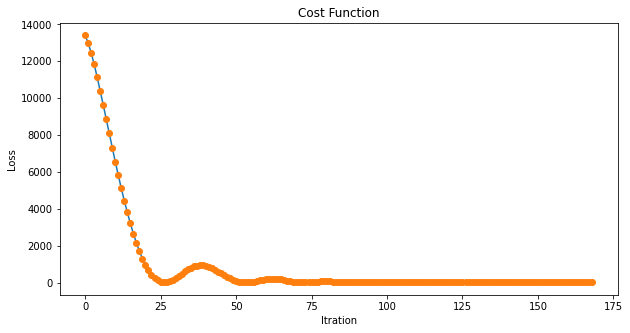

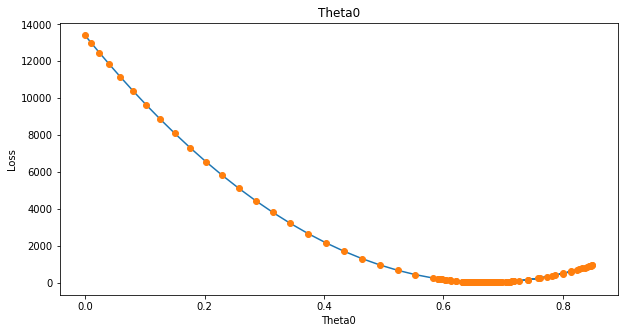

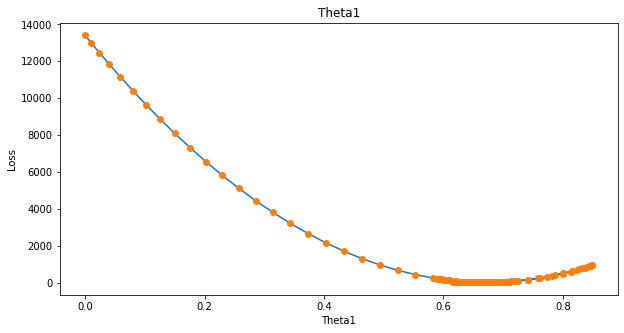

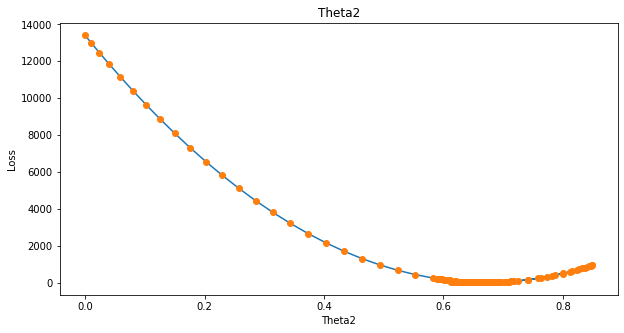

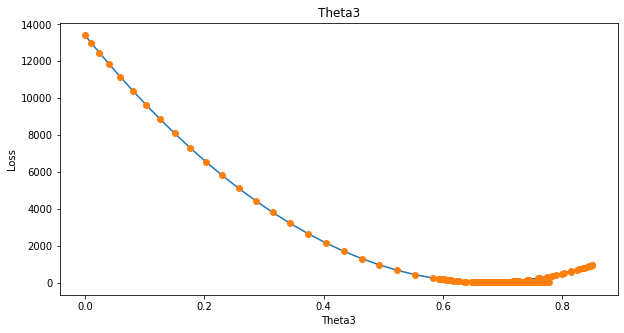

In [34]:
h, ths, ths_hist, loss_hist = Adam_alg(multi_data.drop([3], axis=1), multi_data.iloc[:,3], alpha = 0.01,beta1 =0.92, beta2=0.92, itr = 1e6, bias=True)
plt.figure(figsize=(10,5))
plt.plot(loss_hist)
plt.plot(loss_hist, 'o')
plt.title('Cost Function')
plt.xlabel('Itration')
plt.ylabel('Loss')

for i in range(ths.shape[0]):

    plt.figure(figsize=(10,5))
    plt.plot(np.array(ths_hist)[:,i], loss_hist)
    plt.plot(np.array(ths_hist)[:,i], loss_hist, 'o')
    plt.title(f'Theta{i}')
    plt.xlabel(f'Theta{i}')
    plt.ylabel('Loss')

print('***************************************')
print('R2 score = ', r2_score(multi_data.iloc[:,3], h))
print('***************************************')

# 2. Mini Batch Algorithm

## The Model

In [32]:
def mini_batch_GD_alg(X, Y, alpha = 0.01, b = 10, itr = 1e6, bias=True):
    # *************** shuffel Data ***************
    data_shuff = pd.concat((X, Y), axis=1)
    np.random.seed(720)
    np.random.shuffle(data_shuff.values)

    X = data_shuff.values[:, :-1]
    Y = data_shuff.values[:, -1]
    # X = X.values
    # Y = Y.values


    # *************** Step 1 ***************
    if len(X.shape) > 1:
        m,n = X.shape
    else:
        m = X.shape[0]
        n = 1
    if bias:
        thetas = np.zeros((n+1, 1))  
        x0 = np.ones((m,1))
        X = np.c_[x0, X]
        Y = Y.reshape(-1,1)
    else:
        thetas = np.zeros((n, 1))  
        Y = Y.reshape(-1,1)
    # if b > 0:
    #     epoch = int(m/b)  
    b = int(b)
    thetas_history = []
    loss_history = []
    
    flag = False
    for _ in range(int(itr)):

        # ************ Loop on all data ************
        for i in range(0, m+1,b):
            X_slice = X[i:b+i,:]
            Y_slice = Y[i:b+i]
            # *************** Step 2 ***************
            y_hat = X_slice @ thetas # X(m,n) @ thetas(n,1) = (m,1)


            # *************** Step 3 ***************
            # ********* cost function as J *********
            error = y_hat - Y_slice
            J = ((error.T @ error).item())/(2*b) # error.T(1,m) error(m,1) = (1,1)


            # ************ stop condtion ************
            if len(thetas_history) > 2:
                if np.abs(loss_history[-1]-loss_history[-2]) < 0.001:
                    flag = True
                    break
            loss_history.append(J)
            thetas_history.append(thetas)

            
            # *************** Step 4 ***************
            # ********* gradient of thetas *********
            G_thetas = (X_slice.T @ error)/b  # X(n,m) @ error(m,1) = (n,1)


            # *************** Step 5 ***************
            # *********** Updata thetas ************
            thetas = thetas - alpha * G_thetas
        
        if flag:
            break

    return thetas, thetas_history, loss_history

## Testing Model

***************************************
R2 score =  0.9832147361517191
***************************************


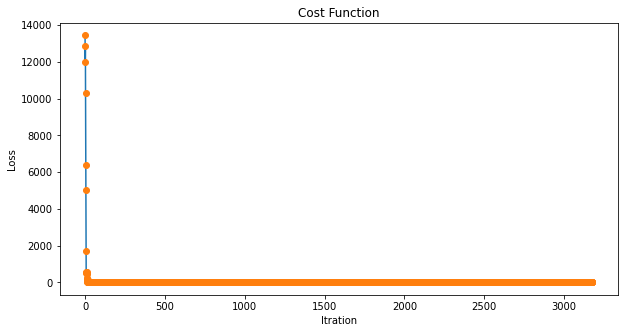

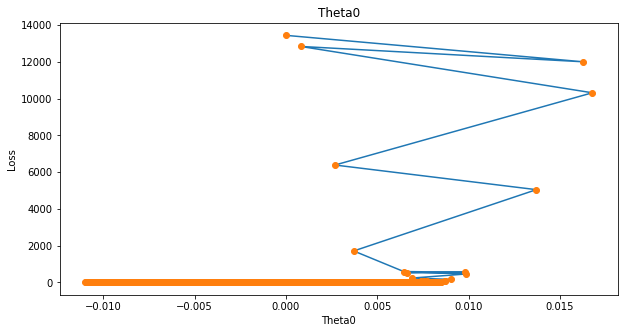

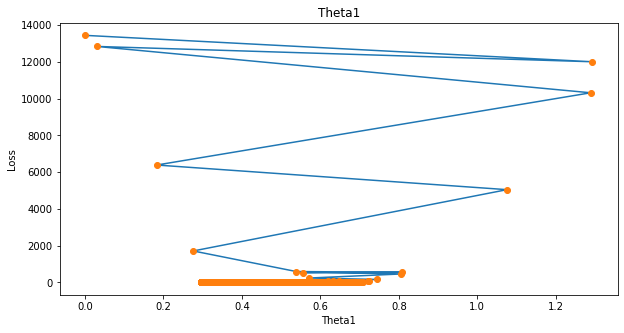

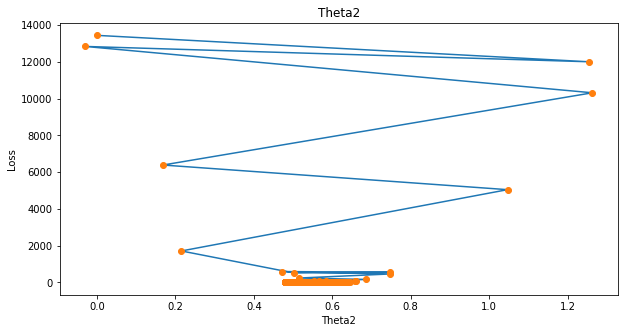

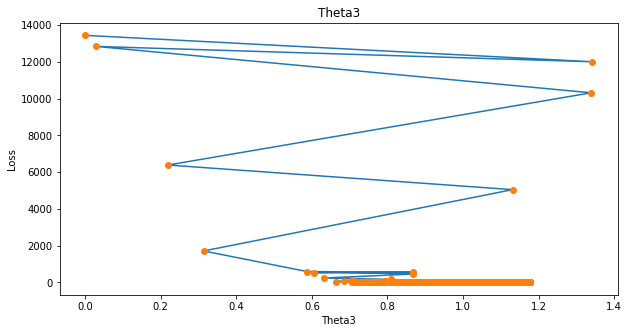

In [54]:
ths, ths_hist, loss_hist = mini_batch_GD_alg(multi_data.drop([3], axis=1), multi_data.iloc[:,3], alpha = 0.0001, b=4 , itr = 1e6, bias=True)

# ********** initlaize the X **********
x0 = np.ones((multi_data.shape[0], 1))
all_x = np.c_[x0,multi_data.drop([3], axis=1).values]

# ********** Calculate Y predect **********
h = all_x@ths

plt.figure(figsize=(10,5))
plt.plot(loss_hist)
plt.plot(loss_hist, 'o')
plt.title('Cost Function')
plt.xlabel('Itration')
plt.ylabel('Loss')

for i in range(ths.shape[0]):

    plt.figure(figsize=(10,5))
    plt.plot(np.array(ths_hist)[:,i], loss_hist)
    plt.plot(np.array(ths_hist)[:,i], loss_hist, 'o')
    plt.title(f'Theta{i}')
    plt.xlabel(f'Theta{i}')
    plt.ylabel('Loss')

print('***************************************')
print('R2 score = ', r2_score(multi_data.iloc[:,3], h))
print('***************************************')

## Again Test

***************************************
R2 score =  0.9810887803079033
***************************************


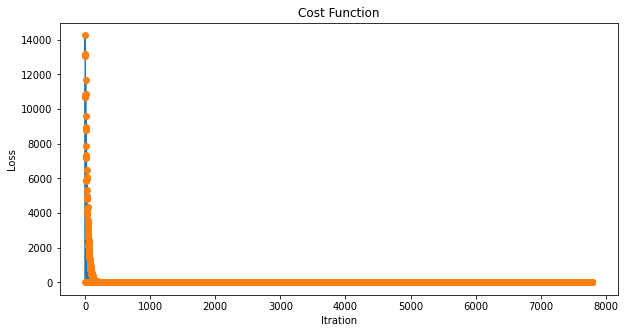

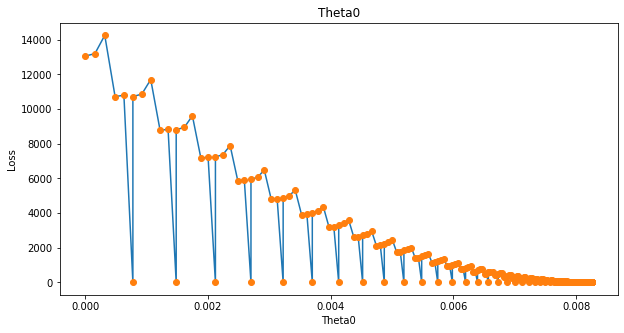

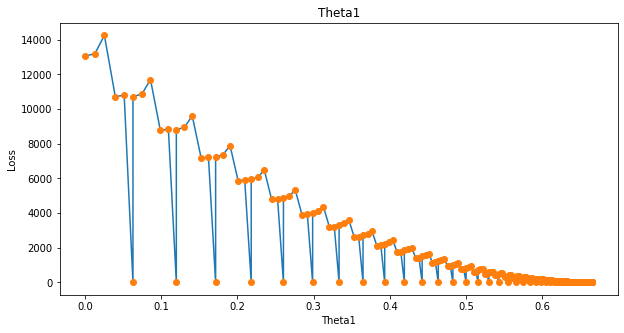

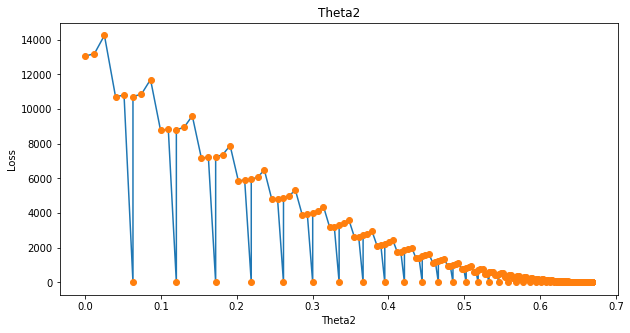

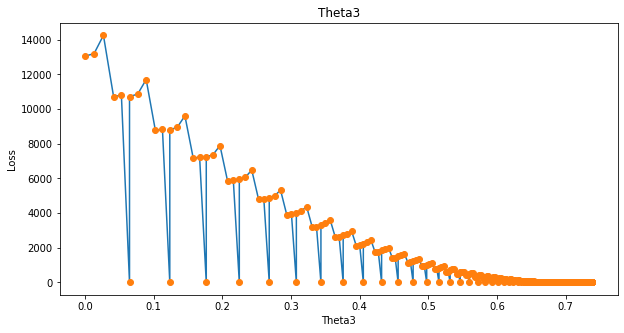

In [58]:
ths, ths_hist, loss_hist = mini_batch_GD_alg(multi_data.drop([3], axis=1), multi_data.iloc[:,3], alpha = 0.000001, b=5 , itr = 1e6, bias=True)

# ********** initlaize the X **********
x0 = np.ones((multi_data.shape[0], 1))
all_x = np.c_[x0,multi_data.drop([3], axis=1).values]

# ********** Calculate Y predect **********
h = all_x@ths

plt.figure(figsize=(10,5))
plt.plot(loss_hist)
plt.plot(loss_hist, 'o')
plt.title('Cost Function')
plt.xlabel('Itration')
plt.ylabel('Loss')

for i in range(ths.shape[0]):

    plt.figure(figsize=(10,5))
    plt.plot(np.array(ths_hist)[:,i], loss_hist)
    plt.plot(np.array(ths_hist)[:,i], loss_hist, 'o')
    plt.title(f'Theta{i}')
    plt.xlabel(f'Theta{i}')
    plt.ylabel('Loss')

print('***************************************')
print('R2 score = ', r2_score(multi_data.iloc[:,3], h))
print('***************************************')

## The best One

***************************************
R2 score =  0.9805257522462143
***************************************


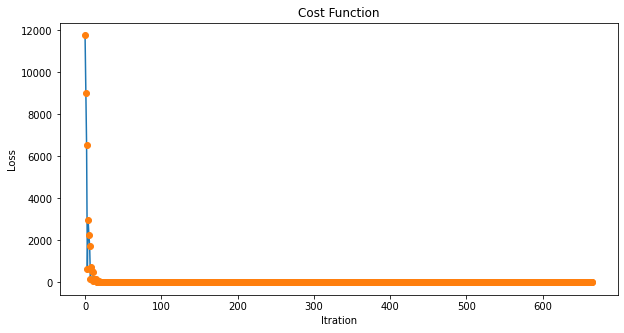

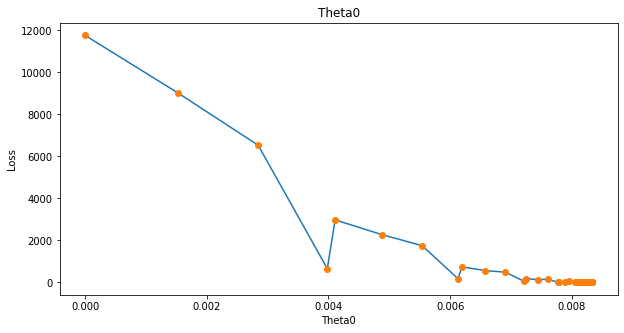

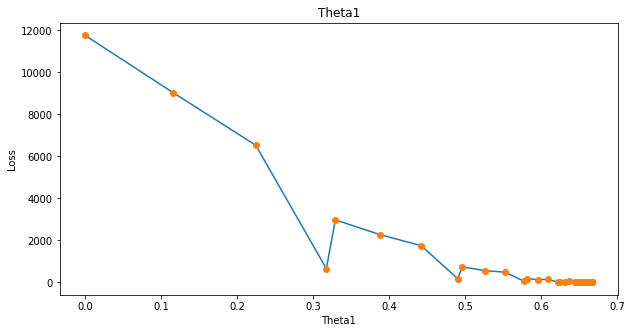

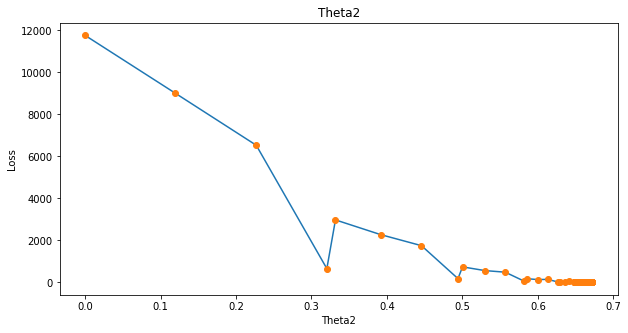

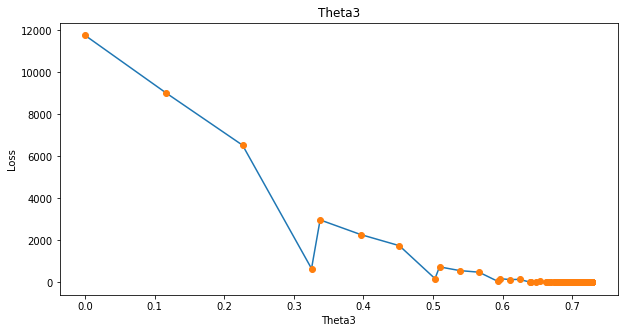

In [43]:
ths, ths_hist, loss_hist = mini_batch_GD_alg(multi_data.drop([3], axis=1), multi_data.iloc[:,3], alpha = 0.00001, b=8 , itr = 1e6, bias=True)

# ********** initlaize the X **********
x0 = np.ones((multi_data.shape[0], 1))
all_x = np.c_[x0,multi_data.drop([3], axis=1).values]

# ********** Calculate Y predect **********
h = all_x@ths

plt.figure(figsize=(10,5))
plt.plot(loss_hist)
plt.plot(loss_hist, 'o')
plt.title('Cost Function')
plt.xlabel('Itration')
plt.ylabel('Loss')

for i in range(ths.shape[0]):

    plt.figure(figsize=(10,5))
    plt.plot(np.array(ths_hist)[:,i], loss_hist)
    plt.plot(np.array(ths_hist)[:,i], loss_hist, 'o')
    plt.title(f'Theta{i}')
    plt.xlabel(f'Theta{i}')
    plt.ylabel('Loss')

print('***************************************')
print('R2 score = ', r2_score(multi_data.iloc[:,3], h))
print('***************************************')

# 3. Adam algorithm based on Mini batch algorithm

In [12]:
def mini_with_adam_alg(X, Y, alpha = 0.01, b = 10,beta1 =0.99, beta2=0.99, itr = 1e6, bias=True):
    # *************** shuffel Data ***************
    data_shuff = pd.concat((X, Y), axis=1)
    np.random.seed(720)
    np.random.shuffle(data_shuff.values)

    X = data_shuff.values[:, :-1]
    Y = data_shuff.values[:, -1]
    # X = X.values
    # Y = Y.values


    # *************** Step 1 ***************
    if len(X.shape) > 1:
        m,n = X.shape
    else:
        m = X.shape[0]
        n = 1
    if bias:
        thetas = np.zeros((n+1, 1))  
        x0 = np.ones((m,1))
        X = np.c_[x0, X]
        Y = Y.reshape(-1,1)
    else:
        thetas = np.zeros((n, 1))  
        Y = Y.reshape(-1,1)
    b = int(b)
    thetas_history = []
    loss_history = []
    m_t = 0
    v_t = 0
    epslon = 1e-10
    flag = False
    for _ in range(int(itr)):

        # ************ Loop on all data ************
        for i in range(0, m+1,b):
            X_slice = X[i:b+i,:]
            Y_slice = Y[i:b+i]
            # *************** Step 2 ***************
            y_hat = X_slice @ thetas # X(m,n) @ thetas(n,1) = (m,1)


            # *************** Step 3 ***************
            # ********* cost function as J *********
            error = y_hat - Y_slice
            J = ((error.T @ error).item())/(2*b) # error.T(1,m) error(m,1) = (1,1)


            # ************ stop condtion ************
            if len(thetas_history) > 2:
                if np.abs(loss_history[-1]-loss_history[-2]) < 0.001:
                    flag = True
                    break
            loss_history.append(J)
            thetas_history.append(thetas)

            
            # *************** Step 4 ***************
            # ********* gradient of thetas *********
            G_thetas = (X_slice.T @ error)/b  # X(n,m) @ error(m,1) = (n,1)

            
            # ************** momintam ***************
            m_t = beta1 * m_t + (1-beta1) * G_thetas

            
            # *************** Adagrad ***************
            v_t = beta2 * v_t + (1-beta2) * (G_thetas**2)

            
            # *********** Bias Correction ***********
            m_t_hat = m_t/(1-beta1)
            v_t_hat = v_t/(1-beta2)

            # *************** Step 5 ***************
            # *********** Updata thetas ************
            
            thetas = thetas - (alpha / (np.sqrt(v_t_hat) + epslon) ) * m_t_hat
        
        if flag:
            break

    return thetas, thetas_history, loss_history

## Testing Model

***************************************
R2 score =  0.9838774291546342
***************************************


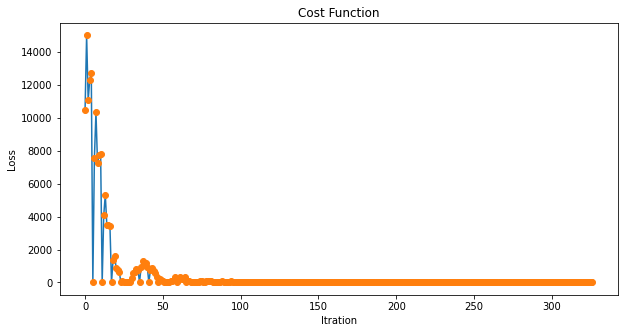

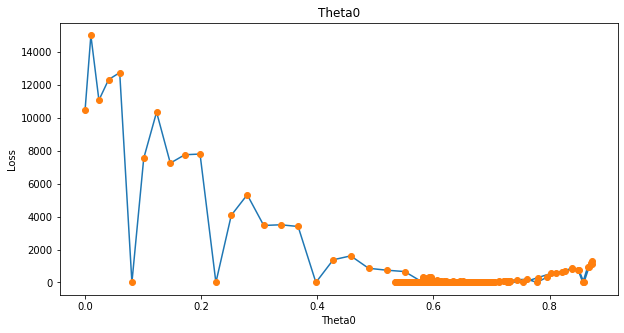

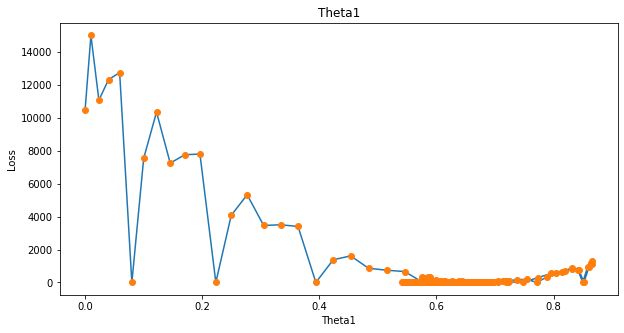

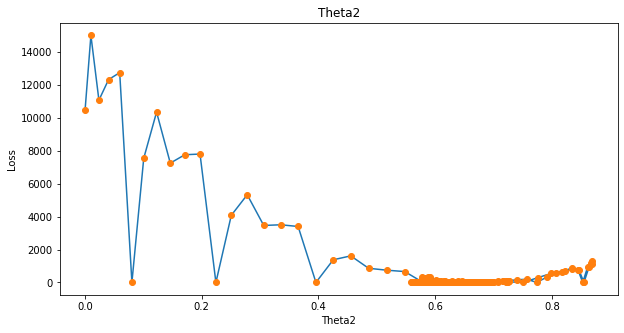

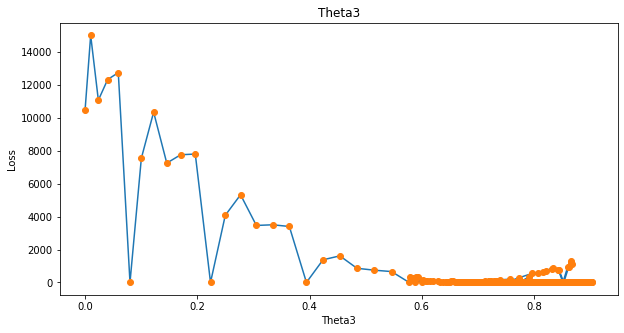

In [32]:
ths, ths_hist, loss_hist = mini_with_adam_alg(multi_data.drop([3], axis=1), multi_data.iloc[:,3], alpha = 0.01,b=5,beta1 =0.92, beta2=0.9, itr = 1e6, bias=True)

# ********** initlaize the X **********
x0 = np.ones((multi_data.shape[0], 1))
all_x = np.c_[x0,multi_data.drop([3], axis=1).values]

# ********** Calculate Y predect **********
h = all_x@ths

plt.figure(figsize=(10,5))
plt.plot(loss_hist)
plt.plot(loss_hist, 'o')
plt.title('Cost Function')
plt.xlabel('Itration')
plt.ylabel('Loss')

for i in range(ths.shape[0]):

    plt.figure(figsize=(10,5))
    plt.plot(np.array(ths_hist)[:,i], loss_hist)
    plt.plot(np.array(ths_hist)[:,i], loss_hist, 'o')
    plt.title(f'Theta{i}')
    plt.xlabel(f'Theta{i}')
    plt.ylabel('Loss')

print('***************************************')
print('R2 score = ', r2_score(multi_data.iloc[:,3], h))
print('***************************************')